## CSCI 635: Home work 1

### Name: Hitesh Ulhas Vaidya
### Email: hv8322@rit.edu

In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [48]:
class Logistic(object):
    
    def __init__(self):
        self.file1 = pd.read_csv('Frogs.csv', header=0, index_col=False)
        self.file2 = pd.read_csv('Frogs-subsample.csv', header=0,
                                 index_col=False)
    def sigmoid(self, x):
        return 1/(1 + np.exp(-x))
    
    def log_loss(self, y, output):
        return -1 * (y*np.log(output) + (1-y)*np.log(1-output))
    
    def output_formula(self, features, weights, bias):
        return self.sigmoid(np.dot(features, weights) + bias)
    
    def update_weights(self, x, y, weights, bias, learn_rate):
        for index in range(len(weights)):
            weights[index] += learn_rate * (y - self.output_formula(x, weights, bias)) * x[index]
        bias += learn_rate * (y - self.output_formula(x, weights, bias))
        return weights, bias

    def plot_points(self, X, y):
        admitted = X[np.argwhere(y==1)]
        rejected = X[np.argwhere(y==0)]
        plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], color = 'blue', edgecolor = 'k', label='HylaMinuta')
        plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], color = 'red', edgecolor = 'k', label='HypsiboasCinerascens')

    def display(self, m, b, color='g--'):
#         plt.xlim(-0.05,1.05)
#         plt.ylim(-0.05,1.05)
        x = np.arange(-0.5, 0.5, 0.1)
        plt.plot(x, m*x+b, color, label='Decision Boundary')

    def train(self, features, targets, epochs, learn_rate, graph_lines=False):
        np.random.seed(1)
        n_epochs = 100
        learn_rate = 0.01
        errors = []
        n_records, n_features = features.shape
        last_loss = None
        weights = np.random.normal(scale=1/n_features**0.5, size=n_features)
        bias = 0
        for e in range(n_epochs):
            del_w = np.zeros(weights.shape)
            for x,y in zip(features, targets):
                output = self.output_formula(x, weights, bias)
                error = self.log_loss(y, output)
                weights, bias = self.update_weights(x, y, weights, bias, learn_rate)

            # Printing out the log-loss error on the training set
            out = self.output_formula(features, weights, bias)
    
            loss = np.mean(self.log_loss(targets, out))
            errors.append(loss)
            if e % (epochs/10) == 0:
                print("\n========== Epoch", e,"==========")
                if last_loss and last_loss < loss:
                    print("Train loss: ", loss, "  WARNING - Loss Increasing")
                else:
                    print("Train loss: ", loss)
                last_loss = loss
                predictions = out > 0.5
                accuracy = np.mean(predictions == targets)
                print("Accuracy: ", accuracy)
            if graph_lines and e % (epochs / 100) == 0:
                self.display(-weights[0]/weights[1], -bias/weights[1])

        # Plotting the solution boundary
        plt.title("Decision boundary")
        self.display(-weights[0]/weights[1], -bias/weights[1], 'black')
        
        # Plotting the data
        self.plot_points(features, targets)
#         self.display(-weights[0]/weights[1], -bias/weights[1], 'black')
        plt.show()

        # Plotting the error
        plt.title("Error Plot")
        plt.xlabel('Number of epochs')
        plt.ylabel('Error')
        plt.plot(errors)
        plt.show()
    
    def run(self):
        data = self.file2.to_numpy()
        np.random.shuffle(data)
        
        X = data[:,:2]
        X = X.astype(np.float64)
        y = np.unique(data[:,2], return_inverse=True)[1]
        n_epochs = 100
        learnrate = 0.01
        self.train(X, y, n_epochs, learnrate, True)
        
        data = self.file1.to_numpy()
        np.random.shuffle(data)
        
        X = data[:,:2]
        X = X.astype(np.float64)
        y = np.unique(data[:,2], return_inverse=True)[1]
        n_epochs = 100
        learnrate = 0.01
        self.train(X, y, n_epochs, learnrate, True)


========== Epoch 0 ==========
Train loss:  0.7726956371875802
Accuracy:  0.14

========== Epoch 10 ==========
Train loss:  0.7278950934824503
Accuracy:  0.28

========== Epoch 20 ==========
Train loss:  0.6874764212865504
Accuracy:  0.56

========== Epoch 30 ==========
Train loss:  0.6510286268727796
Accuracy:  0.88

========== Epoch 40 ==========
Train loss:  0.6181508687314272
Accuracy:  0.94

========== Epoch 50 ==========
Train loss:  0.5884639432813739
Accuracy:  0.96

========== Epoch 60 ==========
Train loss:  0.5616171090438717
Accuracy:  0.96

========== Epoch 70 ==========
Train loss:  0.5372914141385285
Accuracy:  0.96

========== Epoch 80 ==========
Train loss:  0.5152004917069631
Accuracy:  0.96

========== Epoch 90 ==========
Train loss:  0.49508964114832793
Accuracy:  0.96


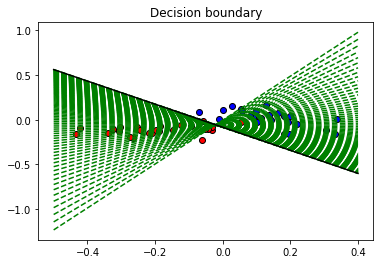

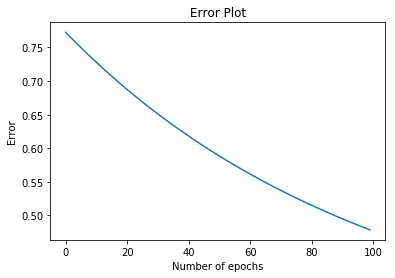


========== Epoch 0 ==========
Train loss:  0.6892415326797129
Accuracy:  0.6035805626598465

========== Epoch 10 ==========
Train loss:  0.3841161713961035
Accuracy:  0.9296675191815856

========== Epoch 20 ==========
Train loss:  0.30836342524741894
Accuracy:  0.9398976982097187

========== Epoch 30 ==========
Train loss:  0.27703038268276337
Accuracy:  0.9398976982097187

========== Epoch 40 ==========
Train loss:  0.26043237568516137
Accuracy:  0.9398976982097187

========== Epoch 50 ==========
Train loss:  0.2503630441836579
Accuracy:  0.9411764705882353

========== Epoch 60 ==========
Train loss:  0.24371450843781264
Accuracy:  0.9437340153452686

========== Epoch 70 ==========
Train loss:  0.23906395780479142
Accuracy:  0.9450127877237852

========== Epoch 80 ==========
Train loss:  0.2356724321188937
Accuracy:  0.9450127877237852

========== Epoch 90 ==========
Train loss:  0.23312000173172664
Accuracy:  0.9450127877237852


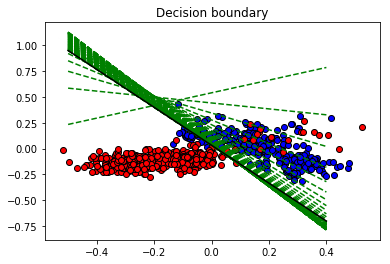

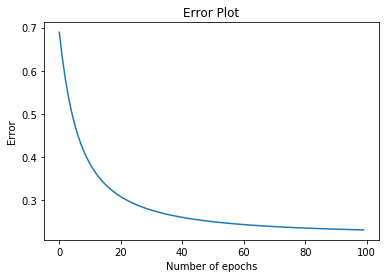

In [49]:
reg = Logistic()
reg.run()